# MODELO SUPERVISADO 

##### OBJETIVO: Predecir cuanta energía eólica producirán los países de America del sur en los proximos 5 años 

In [1]:
# Se importan las librerías que se utilizarán: 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.cm as cm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier   #ver porque si no se usa hay que sacarlo
from sklearn.model_selection import GridSearchCV

In [2]:
import plotly.express as px


In [3]:
# Se importa el dataset 
suram = pd.read_csv(r'..\\datasets\\suram1.csv')  

In [ ]:
wec = pd.read_csv(r'..\\datasets\\wec.csv')  

In [4]:
# Se consultan los datos únicos que integran la columna country 
suram['country'].unique() 

array(['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador',
       'French Guiana', 'Guyana', 'Paraguay', 'Peru', 'Suriname',
       'Trinidad and Tobago', 'Uruguay', 'Venezuela'], dtype=object)

In [7]:
fig = px.scatter(x=suram["year"], y=suram["wind_electricity"], color=suram['country'])
fig.show()

In [12]:
fig = px.scatter(x=suram["year"], y=suram["nuclear_electricity"], color=suram['country'])
fig.show()

In [8]:
# Se consultan los nombres de las columnas
print(suram.columns)

Index(['iso_code', 'country', 'year', 'coal_share_elec',
       'coal_elec_per_capita', 'electricity_generation', 'biofuel_electricity',
       'coal_electricity', 'fossil_electricity', 'gas_electricity',
       'hydro_electricity', 'nuclear_electricity', 'oil_electricity',
       'other_renewable_electricity',
       'other_renewable_exc_biofuel_electricity', 'renewables_electricity',
       'solar_electricity', 'wind_electricity', 'energy_per_capita',
       'fossil_cons_per_capita', 'fossil_share_elec', 'gas_share_elec',
       'gas_elec_per_capita', 'hydro_share_elec', 'hydro_elec_per_capita',
       'low_carbon_share_elec', 'low_carbon_electricity',
       'low_carbon_elec_per_capita', 'oil_share_elec', 'oil_elec_per_capita',
       'other_renewables_elec_per_capita', 'other_renewables_share_elec',
       'per_capita_electricity', 'population', 'primary_energy_consumption',
       'renewables_elec_per_capita', 'renewables_share_elec',
       'solar_share_elec', 'solar_elec_per_cap

In [ ]:
suram = suram["iso_code", country, year]

In [5]:
# Se observan cuántos valores faltantes tiene cada columna 
missing_values =suram.isnull().sum().sort_values(ascending = False) 
missing_values

iso_code                                   0
gas_share_elec                             0
hydro_share_elec                           0
hydro_elec_per_capita                      0
low_carbon_share_elec                      0
low_carbon_electricity                     0
low_carbon_elec_per_capita                 0
oil_share_elec                             0
oil_elec_per_capita                        0
other_renewables_elec_per_capita           0
other_renewables_share_elec                0
per_capita_electricity                     0
population                                 0
primary_energy_consumption                 0
renewables_elec_per_capita                 0
renewables_share_elec                      0
solar_share_elec                           0
solar_elec_per_capita                      0
wind_share_elec                            0
gas_elec_per_capita                        0
fossil_share_elec                          0
country                                    0
fossil_con

In [6]:
# Se crean las variables dummies patra la columna country
suram2 = pd.get_dummies(suram1['country'])

In [33]:
suram1= pd.concat([suram1, suram2], axis=1)
suram1

,year,coal_share_elec,coal_elec_per_capita,electricity_generation,biofuel_electricity,coal_electricity,fossil_electricity,gas_electricity,hydro_electricity,nuclear_electricity,...,Colombia,Ecuador,French Guiana,Guyana,Paraguay,Peru,Suriname,Trinidad and Tobago,Uruguay,Venezuela
0,1998,2.438,50.134,74.170,0.68,1.808,33.639,28.021,32.422,7.453,...,False,False,False,False,False,False,False,False,False,False
1,1999,2.608,57.751,80.745,0.68,2.106,46.146,40.209,26.530,7.106,...,False,False,False,False,False,False,False,False,False,False
2,2000,2.176,50.311,85.240,0.68,1.855,50.054,45.125,28.486,5.985,...,False,False,False,False,False,False,False,False,False,False
3,2001,1.657,38.452,86.501,0.62,1.433,42.638,40.126,36.653,6.541,...,False,False,False,False,False,False,False,False,False,False
4,2002,1.080,23.269,81.156,0.87,0.877,39.331,37.593,35.492,5.390,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,2015,0.000,0.000,119.181,0.00,0.000,44.953,44.953,74.150,0.000,...,False,False,False,False,False,False,False,False,False,True
311,2016,0.000,0.000,104.654,0.00,0.000,42.247,42.247,62.329,0.000,...,False,False,False,False,False,False,False,False,False,True
312,2017,0.000,0.000,100.581,0.00,0.000,40.601,40.601,59.902,0.000,...,False,False,False,False,False,False,False,False,False,True
313,2018,0.000,0.000,96.665,0.00,0.000,39.019,39.019,57.568,0.000,...,False,False,False,False,False,False,False,False,False,True


In [8]:
# Se elimina la variable que no se van a incluir en el modelo.
suram1= suram1.drop(['iso_code', 'country'], axis=1)

## MODELO DE REGRESIÓN:

#### Se elimina la variable independiente, que no se incluirá en el modelo y se guarda en x. 

In [25]:
# Se elimina la variable independiente, que no se incluirá en el modelo y se guarda en x. 
x= suram1.drop(['year', 'wind_electricity'], axis=1)

In [26]:
lista_atributos = x.columns

In [27]:
# Se seleccionan las etiquetas y se guardan en y
y = suram1['wind_electricity']

In [28]:
x, y = np.array(x), np.array(y)

In [29]:
x     

array([[2.438, 50.134, 74.17, ..., False, False, False],
       [2.608, 57.751, 80.745, ..., False, False, False],
       [2.176, 50.311, 85.24, ..., False, False, False],
       ...,
       [0.0, 0.0, 100.581, ..., False, False, True],
       [0.0, 0.0, 96.665, ..., False, False, True],
       [0.0, 0.0, 89.16, ..., False, False, True]], dtype=object)

In [14]:
y[:10]    

array([0.033, 0.035, 0.035, 0.049, 0.073, 0.078, 0.072, 0.075, 0.07 ,
       0.061])

#### Separando Train / Test

Se entrenará con 80% de los datos y se testeará con el 20% de los datos.

In [253]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

In [254]:
# Se consultan las filas y columnas
x.shape

(315, 51)

In [255]:
# 252 datos serán destinados al entrenamiento del modelo
X_train.shape

(252, 51)

In [256]:
# 63 datos serán destinados al testeo
X_test.shape  

(63, 51)

In [257]:
X_test

array([[ 0.486,  3.705, 20.422, ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  5.599, ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.914, ...,  0.   ,  0.   ,  0.   ],
       ...,
       [ 0.   ,  0.   ,  8.335, ...,  1.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.904, ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   , 87.733, ...,  0.   ,  0.   ,  1.   ]])

### RANDOM FOREST

In [258]:
# Inicializo el modelo
regresor = RandomForestRegressor(criterion='mae', random_state=42)

In [259]:
# Se inicia el modelo
regresor = RandomForestRegressor(criterion='absolute_error', random_state=42)

In [260]:
# Se entrena el modelo
regresor.fit(X_train, y_train);

In [261]:
regresor.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'absolute_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [262]:
# Se predicen los valores para el set de testeo
y_pred = regresor.predict(X_test)

In [263]:
# Se calcula el error medio absoluto
mean_absolute_error(y_test, y_pred)

0.10753253968253998

### SUPPORT VECTOR MACHINE

In [264]:
# Se inicia el modelo
regresor_svr = SVR(C=1.0, epsilon=0.2)

In [265]:
# Se entrena el modelo
regresor_svr.fit(X_train, y_train);

In [266]:
regresor_svr.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.2,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [267]:
#Se predicen los valores para el set de testeo
y_pred_svr = regresor_svr.predict(X_test)

In [268]:
# Se calcula el error medio absoluto
mean_absolute_error(y_test, y_pred_svr)

0.6926027392374664

## ANÁLISIS Y EVALUACIÓN DEL MODELO MÁS ACORDE PARA LA REGRESIÓN

In [269]:
# Se calculan los errores 
def evaluation(y_test, predictions):
    """
    Funcion que devuelve el error absoluto medio y el error porcentual absoluto medio.

    :param y_test: valores reales
    :param predictions: valores predichos

    :return: Devuelve el error absoluto medio y el error porcentual absoluto medio.
    """
    # Calcula mae
    mae = mean_absolute_error(y_test, predictions)
    #calculate mape
    mape = np.mean((np.abs(y_test - predictions)/y_test)*100)
    #print calculated values
    print(f"El error absoluto medio para el modelo es {round(mae, 2)}")
    print(f"El error porcentual absoluto medio para el modelo es {round(mape, 2)}")

In [270]:
def graph_real_pred(y_test, predictions, color):
    """
    Funcion que grafica los valores reales vs. predichos
    :param y_test: valores reales
    :param predictions: valores predichos
    :param color: color para el plot.

    :return: Scatterplot mostrando la relacion entre el valor real y el predicho
    """
    plt.scatter(y_test, predictions, c=color, s=10)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.xlabel('Real', size=15, labelpad=1)
    plt.ylabel('Predicted', size=15, labelpad=1)
    plt.show()

In [271]:
# Se consultan los hiperparámetros más importantes
def feature_importance(model, feature_list):
    """
    Function that gets and plots the feature importance
    for the given model
    :param model: the model to evaluaate
    :param feature_list: a list of features contained in the model

    :returns a plot with feature importance
    """
    # Obtiene la lista de importancias
    importances = list(model.feature_importances_)
    # Junta los nombres de los atributos y las importancias
    feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
    # Ordena por orden de importancia
    feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
    # Print la lista de importancias
    [print('Variable: {} Importance: {}'.format(*pair)) for pair in feature_importances];
    # Colores
    colors = cm.rainbow(np.linspace(0, 1, len(feature_list)))

    # Caracteristicas en orden de importancia
    characteristics = [x[0] for x in feature_importances]
    # Obtiene las importancias
    importances_plot = [x[1] for x in feature_importances]
    # Grafica un bar plot
    plt.bar(characteristics, importances_plot, color=colors)
    # Personalizamos el grafico
    plt.xticks(list(range(len(characteristics))), characteristics, rotation = 90)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gcf().subplots_adjust(bottom=0.3);

In [272]:
# Valores para los parametros a optimizar
param_grid_rf = {
    'criterion': ['absolute_error'],
    'n_estimators': [70, 80, 90, 100, 120],
    'max_features': ['log2','sqrt'],
    'max_depth': [1, 3, 5, 10, 20, 50],
    'min_samples_leaf': [1, 3, 5, 10, 20, 50]
}

In [273]:
# Inicializamos un modelo
grid_regresor = RandomForestRegressor(random_state=42)

In [274]:
# Creamos la busqueda
rf_search = GridSearchCV(estimator=grid_regresor, param_grid=param_grid_rf,
                         cv=5, scoring='neg_mean_absolute_error', verbose=2, n_jobs=-1)

In [275]:
# Corremos el gridsearch con una validación usando 3 folds.
rf_search.fit(X_train, y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['absolute_error'],
                         'max_depth': [1, 3, 5, 10, 20, 50],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [1, 3, 5, 10, 20, 50],
                         'n_estimators': [70, 80, 90, 100, 120]},
             scoring='neg_mean_absolute_error', verbose=2)

## ¿cuál es el mejor estimador?

In [285]:
rf_search.best_estimator_

RandomForestRegressor(criterion='absolute_error', max_depth=5,
                      max_features='sqrt', random_state=42)

In [286]:
rf_search.best_params_

{'criterion': 'absolute_error',
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'n_estimators': 100}

In [287]:
rf_search.best_score_

-0.40161094078431414

In [288]:
# Asignamos el mejor estimador a mejor_regresor
mejor_regresor = RandomForestRegressor(criterion='absolute_error', n_estimators=70, max_depth=5, max_features='sqrt', min_samples_leaf=10)

In [289]:
# Entrenamos el modelo
mejor_regresor.fit(X_train, y_train)

RandomForestRegressor(criterion='absolute_error', max_depth=5,
                      max_features='sqrt', min_samples_leaf=10,
                      n_estimators=70)

In [290]:
# Hacemos la prediccion para el test de evaluación
predicciones = mejor_regresor.predict(X_test)

In [291]:
# Error
evaluation(y_test, predicciones)

El error absoluto medio para el modelo es 0.47
El error porcentual absoluto medio para el modelo es nan


C:\Users\Usuario\AppData\Local\Temp\ipykernel_16216\476445176.py:14: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean((np.abs(y_test - predictions)/y_test)*100)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_16216\476445176.py:14: RuntimeWarning: invalid value encountered in divide
  mape = np.mean((np.abs(y_test - predictions)/y_test)*100)


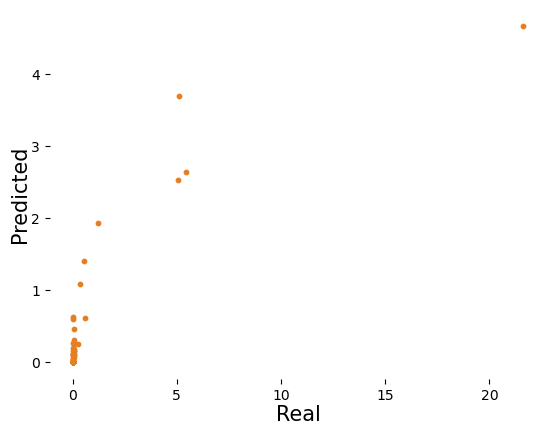

In [292]:
# Correlacion
graph_real_pred(y_test, predicciones, color='#E67E22')

Variable: wind_share_elec Importance: 0.26
Variable: wind_elec_per_capita Importance: 0.19
Variable: solar_electricity Importance: 0.11
Variable: other_renewables_share_elec Importance: 0.07
Variable: coal_electricity Importance: 0.04
Variable: nuclear_electricity Importance: 0.04
Variable: other_renewables_elec_per_capita Importance: 0.04
Variable: solar_share_elec Importance: 0.04
Variable: gas_electricity Importance: 0.03
Variable: primary_energy_consumption Importance: 0.03
Variable: electricity_generation Importance: 0.02
Variable: fossil_electricity Importance: 0.02
Variable: Brazil Importance: 0.02
Variable: coal_share_elec Importance: 0.01
Variable: coal_elec_per_capita Importance: 0.01
Variable: other_renewable_electricity Importance: 0.01
Variable: renewables_electricity Importance: 0.01
Variable: hydro_elec_per_capita Importance: 0.01
Variable: low_carbon_elec_per_capita Importance: 0.01
Variable: solar_elec_per_capita Importance: 0.01
Variable: biofuel_electricity Importanc

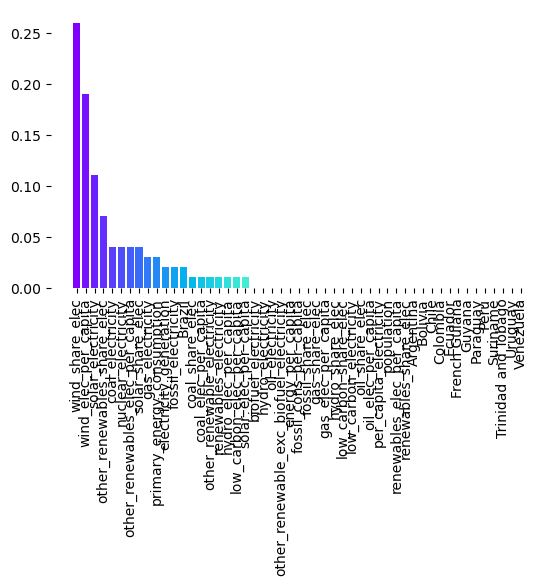

In [294]:
# Importancia de cada feature
feature_importance(mejor_regresor, lista_atributos)